# Barcode mapping of test run

In [1]:
using wgregseq, CSV, DataFrames, Glob, BioSequences, CairoMakie

wgregseq.plotting_style.default_makie!()

Find local path.

In [4]:
# Set path
dir = @__DIR__
home_dir = joinpath(split(dir, "/")[1:end-3])
exp_dir = joinpath(split(dir, "/")[end])

"20220511_mapping_test"

Import barcodes from sequences.

In [23]:
files = glob("../../../data/barcodes/$exp_dir/*_merged_barcodes.txt")

df = DataFrame()
for file in files
    _df = CSV.read(file, DataFrame, header=["barcode", "promoter"])
    insertcols!(_df, 2, :group => split(split(file, '/')[end], '_')[1])
    append!(df, _df)
end

df.promoter = map(x -> LongDNA{4}(x), df.promoter)
first(df, 5)

,barcode,group,promoter
,String31,SubStrin…,LongSequ…
1,AAAATAATGAAAGAAAAAAG,100,TTGCGCTGGCCTATGGGCTCGCCTGTAAAGTGATGCCGATTATTTAACACACAAGCATCACTGTTCTAAACCATTACACTTACTTTATTTATCACTGTCGTTACTATATCGGATCAAATTAATGAGGTCATATCCCAATGGATAGTTCGTTTACGACACT
2,ATAACAAGACAGGAAAAAAA,100,TTCAGGTAGGATCCGCTAATCTGATGGATAAAAAGGCTATGTCCTAACAAAATGTCACGCCGTGCAAATAGTCAATGTGGACTTGTCTGCCGTTATTATCGTCGCTTTTGTTGCGCGTTTTTGTAATGGCTTTGGTCCCGCTGTGTTACGGAATGCTTTT
3,GAATGAAGCGAAACGAACAA,100,AAACGAAAGCAGCTCTGGTATAAGCCAGTTGAAAGAGGGAGATAGTCTCCCTCTGTTCGTTTCAACGCCATCAAAACATTGGCGTTTATCGCCGTAGCCTTTTCAATTAACGTCTATTGAAGACTAACAAAGGGCAACGCAAGCAATGGATGCCGCTATA
4,GAGCTACCACACCCGAAGAA,100,GATTCCGAGTCCTCTTTCGTATCATATCTGTGTTTTTTTAACGTCATCACAGTTCCTACCAGCCCTGAGGCTTATCGTCGTTTCTTGCGTCAATTTTGCCTGCTTAGACTAAATCTTTGCCATTAGAACCAAATGTTCAAATCTAGTGGTTTACTAAGTA
5,GGGTAGAGGAGCGTTAGGGG,100,CCAGTTTCATCATTCCATTTTATTTTGCGAGAGAGCTCGCACATTTCAATTATCTCAATAACGGTGTGAAATCAGATAATTGAGCAACTGAAAGGTAGTGCCCAATATTACGAGATCATGTATCACCCACGGCATAACCTGATTATGTAGTTCAATATGC


Show how many reads were found for each group.

In [24]:
display(combine(groupby(df, "group"), nrow))
println("Total reads: $(combine(groupby(df, "group"), nrow)[!, "nrow"] |> sum)")

,group,nrow
,SubStrin…,Int64
1,100,563889
2,110,106955
3,201,113366
4,204,198724


Total reads: 982934


In [25]:
df_seqs = CSV.read("../../../data/twist_orders/2022-02-15_twist_order.csv", DataFrame)
df_seqs.sequence = LongDNA{4}.(df_seqs.sequence)
insertcols!(df_seqs, 2, :promoter_seq => [x[27:186] for x in df_seqs.sequence])
first(df_seqs, 5)

,genes,promoter_seq
,String,LongSequ…
1,"[""rspA"", ""rspB""]",TTTCATCTTTTGTCAACCATTCACAGCGCAAATATACGCCTTTTTTTGTGATCACTCCGGCTTTTTTCGATCTTTATACTTGTATGGTAGTAGCTCAGTTGCGTAGATTTCATGCATCACGACAAGCGATGCAAGGAATCGAACATGAAGATCGTAAAGG
2,"[""rspA"", ""rspB""]",TCTGATCTTTTGTAAATCATTCACAGTGCAAATTTAAGTCTTTTTTTGTGATCACTCCGGCTATATTCGATCTATTTACTTGTATGGTAGTAGCTCAGTTGCGTAGATTTCATGCGTCACGACAAGCGACGCAGGGAATCGAATATGAAGATCGTAAAGG
3,"[""rspA"", ""rspB""]",TTTCATCTTTTCTCAACCACTCACAGCGTAAACTTACGCCTGTTTGTGTGATCACTACGGCGTTTTTCAATCTTTATACTTGTATGGTAGTCTCTCAGTTGCGTAGATTTGCTGCATCACGACAAGCGATGCATGGAATCGAACATGAAGGTCGTAAAGG
4,"[""rspA"", ""rspB""]",GTTCATCCTTCTTCAACCATTCACAGCGGAAATATACGCCTTTTCTCGAGATCACTCCGGCTTTTTTCGATCTTTATACTTGTATGGTAGTAGCTGAGTTGTGTAGTTTTCATGCATCACAACACGCGATGCAAGGAATGAAACATGAGGATCGTAAAGG
5,"[""rspA"", ""rspB""]",TTTCATCTTTTGTCAACCATTCACCGCGCAAATATACGCCTTCTTTTGTGATCACTCAGGCTCTTTTCGATCTTTCTACTAGTATGGTAATAGCTAATTTGCGTGGATTGCATGCATCACGACAAGCATTGCAAGGAATCGAACACGAAGATCCTTAAGG


In [41]:
df_comb = combine(groupby(df, [:promoter, :barcode]), nrow)
sort!(df_comb, :nrow, rev=true)
df_comb = df_comb[!, [:nrow, :barcode, :promoter]]

,nrow,barcode,promoter
,Int64,String31,LongSequ…
1,53,TTGGTGAGGGATCCTAATAA,CGGGGATGTTTTGGCGCGTTACTTGCGCTTCTAGTTTGGTTTTTCGTGCCGTATGTTCGTGCGGTTACAGGCGTTAGATTCACCTACTTTTGTGAATGTATGTAGCATAGCTCAACGACAATATAAACGCAGTAATGGGTTTATTAACTTTTGACCATTG
2,50,TTATCGGTGCCCATCGGGAC,TTTGACTGCCGATTGAGAAGTCATGTGTTAAATGGCGGCACATACATGCACTATGGCACATAACGCCAACCTCTTGCCGTAGCGGCTTCTGCTAGTATCCGCAATAATTTTACATTGTAATCGCGCTAAATACTGCTTCACCACAAGGAATTCAAATGAA
3,28,GAATGTGTTCGACAGCATTG,CAGCCCATAGAGGAACTGCAACTATTGCAAATGAAGAAATTAAGCTGGATGGCATCGCGCAATGAGGAAGATTGGCCGGGGCTGACAGTAAATAGCAATCGTAGAATCAGCCGCAAGCCCGAAAGATTCCAGTGAGGCGCAATGTTCCGGGGGCTTTAGC
4,26,ACGCTGAGTTAGGCTGGACA,AGGAGATATCATCGGCGTATCCTGTAAAGAAGGTGAAGTGACAGAAGGCATATTTGAAAAATACCGTATCGCTACATACATAGGAGCCAGCTGGAAGCCTTACATCATCGCCGCGATGATCCTTTCCCGTAAATATGCTAAACCAGTTGCACCTCTCGAG
5,23,GCCACCACATAATAAATGTG,GGGTTTGCACGAGGTGTTAATCTCTTTACAACAAAGCAACATAAAAAAGTGGCTGCATAGTTAAGGATGGTCTTTAGAGTGTTTCCCTCTGTAAAAACTTCGTTAATTCGCATGTTGATAATGACCTTTATCAACGAATCCCAAGATTCGTCAAAATTTT
6,22,CAAGACTCTTTACTGACCAT,AGCGGAGTTCCGTAGCCGGGGCAGCGTTTAAATTTCCACTTGCATGTAGCACAGAGTGCAGTCATGCTCGTTTGCTGATTCCGCAAGCCTGGCTGTTCTGCTATGATTGCCTTAATACCTGGGCGATTTTCCACCCCCATTTCAATAAGTTTCAAGAGGT
7,22,GGCGATATTAAATACCGAAT,TGGATCTGACTGGAGTGAGATAGGCATCATCTAACGCATCGTCGCTAATACCATACTAAAACGATTGTAACGACGTGCTGCTTTCATAACCTGCACGTACTGTATGATTATCCAGTTAGCTCTGAGGCGTTTTCACGCTGGCAAGGCGCATAAACTCTTT
8,22,AGATCTAATAGCGACTAAAA,CACGCGGTGAACGGTAACGACGATCCCTGTTTATTCTTTTGCGGAAATCAATCTGTGCCATGTCCTCTCCCGCGTGAGAAAGATGCTTCCCCGTTAGCGCATCGTAAACTATGACTTCGAATGGGGCTTATCACGAGTAAATCTATGAAAATAGGCATTA
9,20,TGATCCGCTCTCGCCGCGGA,GCCTGCATGACAATGTCCTGGCAAAAGTCGTATTGTGACGGAAAACGAACGCCACGCACAGCGGCGCGTACGAAAGGGGAGTGCTTTTCTGTGCTAAGCGGTTAAGATAGTCTCAGGACAATATCTGGAGTTGACCATGTTTGCGTTATTAAAAAGTCTT


In [42]:
df_filt = df_comb[df_comb.nrow .> 2, :]

,nrow,barcode,promoter
,Int64,String31,LongSequ…
1,53,TTGGTGAGGGATCCTAATAA,CGGGGATGTTTTGGCGCGTTACTTGCGCTTCTAGTTTGGTTTTTCGTGCCGTATGTTCGTGCGGTTACAGGCGTTAGATTCACCTACTTTTGTGAATGTATGTAGCATAGCTCAACGACAATATAAACGCAGTAATGGGTTTATTAACTTTTGACCATTG
2,50,TTATCGGTGCCCATCGGGAC,TTTGACTGCCGATTGAGAAGTCATGTGTTAAATGGCGGCACATACATGCACTATGGCACATAACGCCAACCTCTTGCCGTAGCGGCTTCTGCTAGTATCCGCAATAATTTTACATTGTAATCGCGCTAAATACTGCTTCACCACAAGGAATTCAAATGAA
3,28,GAATGTGTTCGACAGCATTG,CAGCCCATAGAGGAACTGCAACTATTGCAAATGAAGAAATTAAGCTGGATGGCATCGCGCAATGAGGAAGATTGGCCGGGGCTGACAGTAAATAGCAATCGTAGAATCAGCCGCAAGCCCGAAAGATTCCAGTGAGGCGCAATGTTCCGGGGGCTTTAGC
4,26,ACGCTGAGTTAGGCTGGACA,AGGAGATATCATCGGCGTATCCTGTAAAGAAGGTGAAGTGACAGAAGGCATATTTGAAAAATACCGTATCGCTACATACATAGGAGCCAGCTGGAAGCCTTACATCATCGCCGCGATGATCCTTTCCCGTAAATATGCTAAACCAGTTGCACCTCTCGAG
5,23,GCCACCACATAATAAATGTG,GGGTTTGCACGAGGTGTTAATCTCTTTACAACAAAGCAACATAAAAAAGTGGCTGCATAGTTAAGGATGGTCTTTAGAGTGTTTCCCTCTGTAAAAACTTCGTTAATTCGCATGTTGATAATGACCTTTATCAACGAATCCCAAGATTCGTCAAAATTTT
6,22,CAAGACTCTTTACTGACCAT,AGCGGAGTTCCGTAGCCGGGGCAGCGTTTAAATTTCCACTTGCATGTAGCACAGAGTGCAGTCATGCTCGTTTGCTGATTCCGCAAGCCTGGCTGTTCTGCTATGATTGCCTTAATACCTGGGCGATTTTCCACCCCCATTTCAATAAGTTTCAAGAGGT
7,22,GGCGATATTAAATACCGAAT,TGGATCTGACTGGAGTGAGATAGGCATCATCTAACGCATCGTCGCTAATACCATACTAAAACGATTGTAACGACGTGCTGCTTTCATAACCTGCACGTACTGTATGATTATCCAGTTAGCTCTGAGGCGTTTTCACGCTGGCAAGGCGCATAAACTCTTT
8,22,AGATCTAATAGCGACTAAAA,CACGCGGTGAACGGTAACGACGATCCCTGTTTATTCTTTTGCGGAAATCAATCTGTGCCATGTCCTCTCCCGCGTGAGAAAGATGCTTCCCCGTTAGCGCATCGTAAACTATGACTTCGAATGGGGCTTATCACGAGTAAATCTATGAAAATAGGCATTA
9,20,TGATCCGCTCTCGCCGCGGA,GCCTGCATGACAATGTCCTGGCAAAAGTCGTATTGTGACGGAAAACGAACGCCACGCACAGCGGCGCGTACGAAAGGGGAGTGCTTTTCTGTGCTAAGCGGTTAAGATAGTCTCAGGACAATATCTGGAGTTGACCATGTTTGCGTTATTAAAAAGTCTT


In [43]:
df_bc_per_prom = combine(groupby(df_filt, :promoter), nrow)[!, [:nrow, :promoter]]
sort!(df_bc_per_prom, :nrow, rev=true)

,nrow,promoter
,Int64,LongSequ…
1,5,GGAGTTTGACGAGGTGTTAATCTGTATATAAAGAAGCAACGTACAAAAGTGGCTGGATCGTTACGGATGGTCTAGGGACTTTTTCCCTCCGTAAACACTTCGTTAGTTCGCATGGTGATAATCACCTTTCTCAACGACGCCCAAGATTAGTCAAAATTGA
2,5,GCTCGCTGCTCCAACGCTGACGTGGTTTGCGTAGCTAATGCTATTTCCTCTCCTCTGGATTTCGGTGAGAGAAGTTTTGACGGCTATCACCCTTTATCAAGAAAGGTCATGATAGACTGATTTTCGGCTAAGGACGAAATCGATGTTAGGTTGGGTACTT
3,5,GGTCACTGATCCAACGTGGACGTAGTTTCCGTAGCTAAGGCTATTTCGTCTCCTCTGGATATGAGGGAGAGGAGTTTTGACGACTATCACCTGTTATCAACAATGGTCAGAGTAGAGTGATTTTCGGCAAACGAGGAAGGCGGTGTGAGGATGGGTAATT
4,4,TCTGCTGTGAACGGCAACGACGGTGCCAGAGTATTTTGTTTCGGAAATCCATCTGTGCCATGTCCTGTCCCGCGCGAGAAATACGCTTCCCCGTAAGCGCATGGTAAACTATGCCTCCGGATGGGGCTAATCGCGAGTAAATCTATGCAAATCGGCATCA
5,4,CGTGCGGTGAGCGGTAACGACGATGCCAGATTATTTTTTTTCGGAAATCAATCTGTGCCATGTCCTGTCCCGAGTGAGAAATACGCTTCCCCGCAAGCGCATCGTAAACTTTTCCTTCAAATCGGGCTTATCGCGAGTGTATTTATGAATCTCGACGTCA
6,4,CGGAGGTGAGTAGTCTTTGGCACCAACAACAACAAAATCCGCCGTTCGTCCTCAAACAAAATTTGTATGAGTTGTAACCTGCGATTCTGATGGCGCTTTTGCTACAATAAATATATTGTTTTACAATCGGTTTTTTTCACATGTACAAACAAGCTGTTAT
7,4,CGGAGGTGAGTAGTCTTTGGCACAAACAATAAGAATATCCGCCTTTCGTCCTCACACATAATTTGTATGGACACTAAGCCGCGATACTGATGGCGCTTTTGCTAGAATAAACGCGTTGTTTCACCCCCGGTTATTTTTTCATGTACACACAAGGTGTTAT
8,4,GGTAGCTGACCCAACATGGACGTGGTTGGCGTAGCGAAGGCTATTTCCTCTCCTCTGGATTTGGGGGAGAGGAGTTTTGACGGATATCACCTTTTATCATCGATGGACAGAGTACACTGATTTTCGGCTAACAAGGAAGGCGATGTAAGGTTCGGTAATT
9,4,CGGGGGTGATTAGTCCTTGGCACCAACAACAAAACAGTCCGCCTTTCGTCCTCAAACATAATTTCTATGAGTATTAACCCACCACTCTGCTGGCGCGTTTGCTACAATAAAAGCGTTGTTGCACCCTCGGTTATTTTTTCATGTAGTAATAAGCTGTCAT


In [26]:
sequence_dict = Dict(df_seqs.promoter_seq .=> df_seqs.name)

Dict{LongSequence{DNAAlphabet{4}}, String} with 178612 entries:
  CCGGCGATCCGTCGTGACATAGCGGTGGTGGTAGCAG… => "ihfAp4_376"
  CTGTTTTATAATAACTTAATCGCGCATAAAAAAAGGC… => "galEp_664"
  AACAAAATCAAACGTTGAGCATAGTCCTTCCCCTTCC… => "yacCp_1339"
  GGGCGCTGATCGAACGTGGACGTGGTTTGCGTAGCTA… => "yadI_predicted_639"
  GTTCAAATTTACAGACAAATATATTTGCGTCAACACC… => "intE_xisE_ymfH_predicted_825"
  TGTCCTGAGAAGTTTTTGCAGTCCCGGCCTTTCGGAC… => "tfaE_stfE_predicted_518"
  TGGCCTGCCCCCTCATCTTATTTCTGGTACTTAGGAG… => "ygeW_predicted_144"
  TATTCAATGTCCAGTTGCGTATCATTTATATGTTTTT… => "xdhAp2_1117"
  CGGACCGTTTCCAGAGGCTGCACCTCGACGCTTGCAG… => "ssnAp_1394"
  ATCTGGAGAACGATCTTGTATTAAGAAGTACCCGTTC… => "yadL_yadM_yadC_yadK_predicted_1360"
  AAAATTATTCATTTTCATCCCTTTCATTTAATCAGTT… => "uacT_predicted_395"
  GGCTTCTCTATCGAGTGGCCCTTTTTTTGCCTTTCAC… => "gatYp_1314"
  CCGGCGAACCGCCAAGACATCGCAATGGTGGACTTAG… => "ihfAp4_1483"
  AGGACCGTTTCCAGACCCTCCACCTCGGCGCTTACTT… => "ssnAp_808"
  ATTCTGAAGGGGCAAGATCAATTTATGTATACCCTTC… => "sulAp_827"
  C

In [27]:
name_list = String[]
for i in 1:nrow(df)
    try
        push!(name_list, sequence_dict[df.promoter[i]])
    catch e
        push!(name_list, "None")
    end
end

In [28]:
name_list |> unique

155050-element Vector{String}:
 "None"
 "pheMp_756"
 "galEp_370"
 "TSS_4655_regulondb_151"
 "TSS_1414_storz_regulondb_295"
 "ghoSp_760"
 "acrBp_1176"
 "rcsBp1_1409"
 "TSS_4655_regulondb_1452"
 "ratA_yfjF_predicted_518"
 "mhpRp1_1426"
 "rdlDp_356"
 "ssnAp_1283"
 ⋮
 "yacCp_1354"
 "yacH_predicted_1195"
 "mtnp_524"
 "ybaY_predicted_906"
 "ykgRp_737"
 "yadL_yadM_yadC_yadK_predicted_257"
 "yahL_predicted_641"
 "yadL_yadM_yadC_yadK_predicted_528"
 "yadN_predicted_1439"
 "yadN_predicted_1084"
 "yadG_yadH_predicted_251"
 "yadN_predicted_534"

In [74]:
UD = df[name_list .== "None", :]
seq1 = hcat(wgregseq.utils.onehot_encoder(UD[1, "promoter"])...) |> vec |> BitVector
insertcols!(UD, 3, :one_hot => [hcat(wgregseq.utils.onehot_encoder(UD.promoter[i])'...) |> vec |> BitVector for i in 1:nrow(UD)])
insertcols!(df_seqs, 3, :one_hot => [hcat(wgregseq.utils.onehot_encoder(df_seqs.promoter_seq[i])'...) |> vec |> BitVector for i in 1:nrow(df_seqs)])


,genes,promoter_seq
,String,LongSequ…
1,"[""rspA"", ""rspB""]",TTTCATCTTTTGTCAACCATTCACAGCGCAAATATACGCCTTTTTTTGTGATCACTCCGGCTTTTTTCGATCTTTATACTTGTATGGTAGTAGCTCAGTTGCGTAGATTTCATGCATCACGACAAGCGATGCAAGGAATCGAACATGAAGATCGTAAAGG
2,"[""rspA"", ""rspB""]",TCTGATCTTTTGTAAATCATTCACAGTGCAAATTTAAGTCTTTTTTTGTGATCACTCCGGCTATATTCGATCTATTTACTTGTATGGTAGTAGCTCAGTTGCGTAGATTTCATGCGTCACGACAAGCGACGCAGGGAATCGAATATGAAGATCGTAAAGG
3,"[""rspA"", ""rspB""]",TTTCATCTTTTCTCAACCACTCACAGCGTAAACTTACGCCTGTTTGTGTGATCACTACGGCGTTTTTCAATCTTTATACTTGTATGGTAGTCTCTCAGTTGCGTAGATTTGCTGCATCACGACAAGCGATGCATGGAATCGAACATGAAGGTCGTAAAGG
4,"[""rspA"", ""rspB""]",GTTCATCCTTCTTCAACCATTCACAGCGGAAATATACGCCTTTTCTCGAGATCACTCCGGCTTTTTTCGATCTTTATACTTGTATGGTAGTAGCTGAGTTGTGTAGTTTTCATGCATCACAACACGCGATGCAAGGAATGAAACATGAGGATCGTAAAGG
5,"[""rspA"", ""rspB""]",TTTCATCTTTTGTCAACCATTCACCGCGCAAATATACGCCTTCTTTTGTGATCACTCAGGCTCTTTTCGATCTTTCTACTAGTATGGTAATAGCTAATTTGCGTGGATTGCATGCATCACGACAAGCATTGCAAGGAATCGAACACGAAGATCCTTAAGG
6,"[""rspA"", ""rspB""]",GTTCATCTTTTGTCAACCATTCACAGCGCGACTCTACGCCTTTTTTTGTGATTACATCGGTTTTTTTCGAGCTTTTTACTTGTATGGTAGTAGCTCAGTTGCGTAGATTTCATGCATCACGACATGAGACGCAAGGAATCGGACATGCAGATCGTAATGG
7,"[""rspA"", ""rspB""]",TTTTAGCTTTTGTCAACCATTCACAGCGCAACTATACGACTTTTTGTGTGATCACTCCGGCTTGTTTCGATCTTTATACTTGTAGGGTAGTCCATCAGTTGCGTAGATTACATGCTTCACGACATGCGATGCAAGGAATCGAACTTGAATATCGTAAAAG
8,"[""rspA"", ""rspB""]",TTTCATCTTTTGTCAACCAGTCATAGTGCAAATATACTGCTTTTTTTGTGATCACTCCGGCTTTTTTCAATTCCTATACTTGTATGGTAGAAGCTCAGTTGCGCAGATTTCATGCATCGCTTCAAGCGATGCAAGGAATCGAACATGAAGATCGTAAGAG
9,"[""rspA"", ""rspB""]",TCTCATCTTTTGTCAACCATTAACAGCGCAAAGATCCGGCTTTTATTGTGATCGCTCCGACTTTTTTCGATCTTTATACTTGTATGGAAGTAGATCAGTCGCGTAGACTTCATGCATTAAGACAAGCGATGCAAGGAATCGAACATGAAGATCGGAAAGT


In [93]:
max_dist = Int64[]
for i in 1:nrow(UD)
    distances = [sum(seq1 .& UD[i, "one_hot"]) for seq1 in df_seqs.one_hot]
    possible_seqs = argwhere(distances .== 1)
    if length(possible_seqs
    push!(max_dist, 160 - maximum(distances))
end



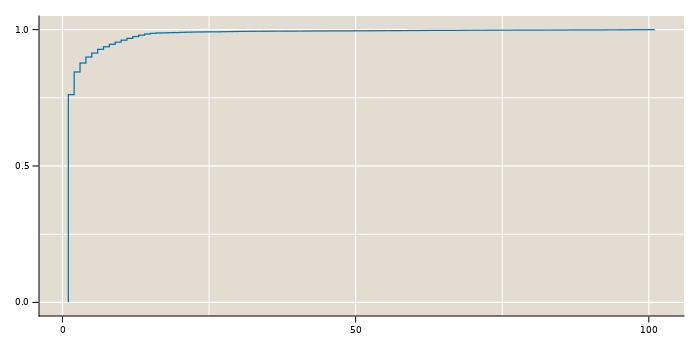

In [96]:
fig = Figure(resolution=(700, 350))
ax = Axis(fig[1, 1])

lines!(ax, sort(max_dist), 1/length(max_dist):1/length(max_dist):1)
fig

In [97]:
sum(max_dist .== 1)

11390